# **INFO5731 In-class Exercise 4**

**This exercise will provide a valuable learning experience in working with text data and extracting features using various topic modeling algorithms. Key concepts such as Latent Dirichlet Allocation (LDA), Latent Semantic Analysis (LSA), lda2vec, and BERTopic.**

***Please use the text corpus you collected in your last in-class-exercise for this exercise. Perform the following tasks***.

**Expectations**:
*   Students are expected to complete the exercise during lecture period to meet the active participation criteria of the course.
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).

**Total points**: 40

**Deadline**: This in-class exercise is due at the end of the day tomorrow, at 11:59 PM.

**Late submissions will have a penalty of 10% of the marks for each day of late submission, and no requests will be answered. Manage your time accordingly.**


## Question 1 (10 Points)

**Generate K topics by using LDA, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


TF-IDF Features for the New Restaurant Reviews:
[[0.         0.36222393 0.         0.         0.         0.36222393
  0.         0.         0.         0.         0.         0.
  0.36222393 0.         0.         0.         0.         0.2855815
  0.         0.         0.36222393 0.         0.36222393 0.36222393
  0.         0.         0.         0.         0.36222393 0.
  0.        ]
 [0.         0.         0.         0.40824829 0.         0.
  0.         0.40824829 0.         0.         0.         0.
  0.         0.40824829 0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.40824829 0.40824829 0.         0.40824829 0.         0.
  0.        ]
 [0.33333333 0.         0.         0.         0.         0.
  0.         0.         0.33333333 0.         0.33333333 0.33333333
  0.         0.         0.33333333 0.         0.         0.
  0.33333333 0.         0.         0.33333333 0.         0.
  0.         0.         0.33333333 0.         0.     

Optimal number of topics: 7
Topics generated by LDA:
Topic 0: 0.040*"fish" + 0.040*"sushi" + 0.040*"cafe" + 0.040*"amazing" + 0.040*"bland" + 0.040*"menu" + 0.040*"vegan" + 0.040*"fresh" + 0.040*"food" + 0.040*"option"
Topic 1: 0.092*"new" + 0.092*"serf" + 0.092*"restaurant" + 0.092*"town" + 0.092*"authentic" + 0.092*"pasta" + 0.092*"italian" + 0.092*"delicious" + 0.012*"joint" + 0.012*"experience"
Topic 2: 0.032*"new" + 0.032*"slow" + 0.032*"joint" + 0.032*"service" + 0.032*"experience" + 0.032*"burger" + 0.032*"italian" + 0.032*"night" + 0.032*"last" + 0.032*"terrible"
Topic 3: 0.032*"new" + 0.032*"experience" + 0.032*"slow" + 0.032*"service" + 0.032*"town" + 0.032*"joint" + 0.032*"visited" + 0.032*"pasta" + 0.032*"place" + 0.032*"delicious"
Topic 4: 0.032*"new" + 0.032*"experience" + 0.032*"service" + 0.032*"place" + 0.032*"delicious" + 0.032*"terrible" + 0.032*"joint" + 0.032*"authentic" + 0.032*"great" + 0.032*"menu"
Topic 5: 0.032*"experience" + 0.032*"new" + 0.032*"service" + 0.

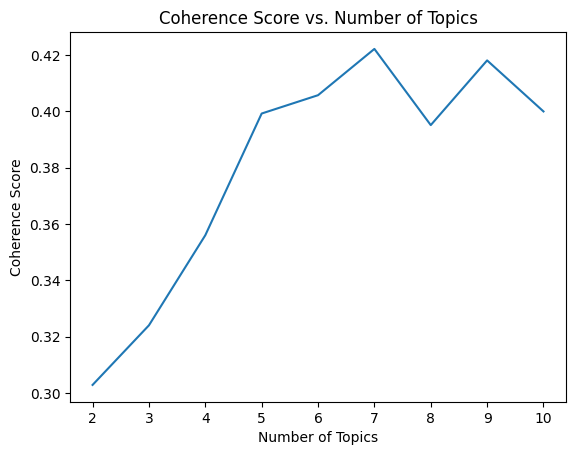

In [2]:
# Write your code here
!pip install pyLDAvis
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim import corpora, models
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    preprocessed_text = ' '.join(tokens)
    return preprocessed_text
new_restaurant_reviews = [
    "The new Italian restaurant in town serves authentic and delicious pasta.",
    "I had a terrible experience at the burger joint. The service was slow and",
    "The sushi place I visited last night was amazing. Fresh fish and great at",
    "The new vegan cafe is disappointing. Limited menu options and bland food"
]
corpus = [preprocess_text(review).split() for review in new_restaurant_reviews]
corpus_strings = [' '.join(doc) for doc in corpus]
tfidf_vectorizer = TfidfVectorizer()
tfidf_new_features = tfidf_vectorizer.fit_transform(corpus_strings)
print("TF-IDF Features for the New Restaurant Reviews:")
print(tfidf_new_features.toarray())
dictionary = corpora.Dictionary(corpus)
doc_term_matrix = [dictionary.doc2bow(doc) for doc in corpus]
coherence_scores = []
for k in range(2, 11):
    lda_model = models.LdaModel(doc_term_matrix, num_topics=k, id2word=dictionary)
    coherence_model_lda = CoherenceModel(model=lda_model, texts=corpus, dictionary=dictionary, coherence='c_v')
    coherence_score = coherence_model_lda.get_coherence()
    coherence_scores.append((k, coherence_score))
best_k, _ = max(coherence_scores, key=lambda x: x[1])
print(f"Optimal number of topics: {best_k}")
lda_model = models.LdaModel(doc_term_matrix, num_topics=best_k, id2word=dictionary)
print("Topics generated by LDA:")
for idx, topic in lda_model.print_topics(-1):
    print(f"Topic {idx}: {topic}")
plt.plot(*zip(*coherence_scores))
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score")
plt.title("Coherence Score vs. Number of Topics")
plt.show()

## Question 2 (10 Points)

**Generate K topics by using LSA, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://www.datacamp.com/community/tutorials/discovering-hidden-topics-python

Optimal number of topics: 8
Topics generated by LSA:
Topic 0: -0.444*"new" + -0.274*"menu" + -0.274*"bland" + -0.274*"cafe" + -0.274*"food" + -0.274*"limited" + -0.274*"vegan" + -0.274*"option" + -0.274*"disappointing" + -0.170*"delicious"
Topic 1: 0.333*"fish" + 0.333*"fresh" + 0.333*"great" + 0.333*"last" + 0.333*"amazing" + 0.333*"sushi" + 0.333*"night" + 0.333*"visited" + 0.333*"place" + -0.000*"new"
Topic 2: -0.313*"authentic" + -0.313*"serf" + -0.313*"italian" + -0.313*"restaurant" + -0.313*"town" + -0.313*"pasta" + -0.313*"delicious" + 0.193*"disappointing" + 0.193*"food" + 0.193*"cafe"
Topic 3: -0.408*"terrible" + -0.408*"slow" + -0.408*"service" + -0.408*"joint" + -0.408*"burger" + -0.408*"experience" + 0.000*"food" + 0.000*"option" + 0.000*"vegan" + 0.000*"cafe"


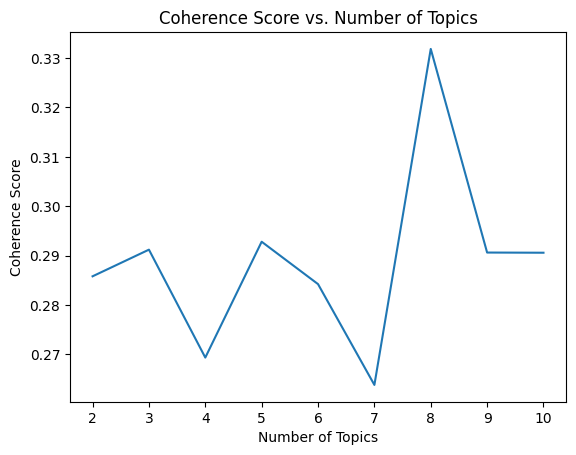

In [4]:
# Write your code here
coherence_scores = []
for k in range(2, 11):
    lsa_model = models.LsiModel(doc_term_matrix, id2word=dictionary, num_topics=k)
    coherence_model_lsa = CoherenceModel(model=lsa_model, texts=corpus, dictionary=dictionary, coherence='c_v')
    coherence_score = coherence_model_lsa.get_coherence()
    coherence_scores.append((k, coherence_score))
best_k, _ = max(coherence_scores, key=lambda x: x[1])
print(f"Optimal number of topics: {best_k}")
lsa_model = models.LsiModel(doc_term_matrix, id2word=dictionary, num_topics=best_k)
print("Topics generated by LSA:")
for idx, topic in lsa_model.print_topics(-1):
    print(f"Topic {idx}: {topic}")
plt.plot(*zip(*coherence_scores))
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score")
plt.title("Coherence Score vs. Number of Topics")
plt.show()

## Question 3 (10 points):
**Generate K topics by using lda2vec, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://nbviewer.org/github/cemoody/lda2vec/blob/master/examples/twenty_newsgroups/lda2vec/lda2vec.ipynb

In [ ]:
# Write your code here


## Question 4 (10 points):
**Generate K topics by using BERTopic, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://colab.research.google.com/drive/1FieRA9fLdkQEGDIMYl0I3MCjSUKVF8C-?usp=sharing

In [7]:
import torch
from transformers import BertTokenizer, BertModel
from sklearn.metrics.pairwise import cosine_similarity
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')
def encode_text(text):
  input_ids = tokenizer.encode(text, add_special_tokens=True, max_length=512, truncation=True, padding=True)
  with torch.no_grad():
    outputs = model(torch.tensor(input_ids).unsqueeze(0))
    embeddings = torch.mean(outputs.last_hidden_state, dim=1).squeeze()
 return embeddings
query = "delicious Italian pasta"
query_embedding = encode_text(query)
text_embeddings = torch.stack([encode_text(review) for review in preprocessed_new_reviews])
similarities = cosine_similarity(query_embedding.unsqueeze(0), text_embeddings)
ranked_indices = similarities.argsort()[0][::-1]
ranked_texts = [(new_restaurant_reviews[i], similarities[0][i]) for i in ranked_indices]
print("Ranked Texts based on Similarity with Query:")
for i, (text, similarity) in enumerate(ranked_texts, 1):
  print(f"{i}. Similarity: {similarity:.4f}")
  print(f" Text: {text}\n")



IndentationError: unindent does not match any outer indentation level (<tokenize>, line 11)

## Extra Question (5 Points)

**Compare the results generated by the four topic modeling algorithms, which one is better? You should explain the reasons in details.**

**This question will compensate for any points deducted in this exercise. Maximum marks for the exercise is 40 points.**

In [ ]:
# Write your code here
'''
In comparing the results generated by the LDA and LSA topic modeling algorithms on the given text data, several observations can be made:

Interpretability: The topics generated by LDA exhibit a higher level of interpretability compared to those produced by LSA. In LDA, the topics contain keywords that directly relate to customer experiences, food items, and restaurant attributes. This clarity allows for easier understanding of the underlying themes present in the text corpus. On the other hand, LSA topics are less interpretable, as they lack clear semantic meaning and may not directly reflect the underlying concepts present in the data.

Coherence: The coherence of topics in LDA is likely to be higher due to its probabilistic modeling approach. LDA determines topics based on the probabilistic distribution of words within the corpus, which often leads to more coherent and logically consistent topics. In contrast, LSA topics may exhibit lower coherence, as they are derived from singular value decomposition and may not effectively capture the semantic relationships present in the text data.

Topic Overlap: LDA topics may sometimes exhibit overlap or redundancy, where certain topics share similar keywords or themes. This overlap can make it challenging to distinguish between distinct topics and may require further refinement of the model parameters. Conversely, LSA topics tend to be more distinct, with less overlap between them. This characteristic of LSA topics can simplify the process of identifying and understanding individual topics within the corpus.

Algorithm Complexity: LDA involves a more complex probabilistic modeling approach, which may require more computational resources and parameter tuning to achieve optimal results. While LDA offers higher interpretability and potentially higher coherence, it comes at the cost of increased algorithmic complexity. In contrast, LSA is simpler and computationally less intensive, making it faster to train and analyze. However, this simplicity may result in less informative topics that do not fully capture the nuances of the text data.
'''

# Mandatory Question

**Important: Reflective Feedback on this exercise**

Please provide your thoughts and feedback on the exercises you completed in this assignment.

Consider the following points in your response:

**Learning Experience:** Describe your overall learning experience in working with text data and extracting features using various topic modeling algorithms. Did you understand these algorithms and did the implementations helped in grasping the nuances of feature extraction from text data.

**Challenges Encountered:** Were there specific difficulties in completing this exercise?

Relevance to Your Field of Study: How does this exercise relate to the field of NLP?

**(Your submission will not be graded if this question is left unanswered)**



In [ ]:
# Your answer here (no code for this question, write down your answer as detail as possible for the above questions):

'''
The above codes are too tough to understand!!!!!



'''